# importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## presenting data

In [2]:
data=pd.read_csv('Add_sales_data_2018.csv') #reading data from location


In [3]:
data.head() # first 10 rows

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.info() # data infomation check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
data.isna().sum() # checking for null values

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [6]:
data.describe() #finding mean, max ,min,  of all mcolumns

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


## correlation metrics

In [7]:
data.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


## Heatmap using seaborn

C:\Users\sarath\anaconda3\lib\site-packages\seaborn\matrix.py:308: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

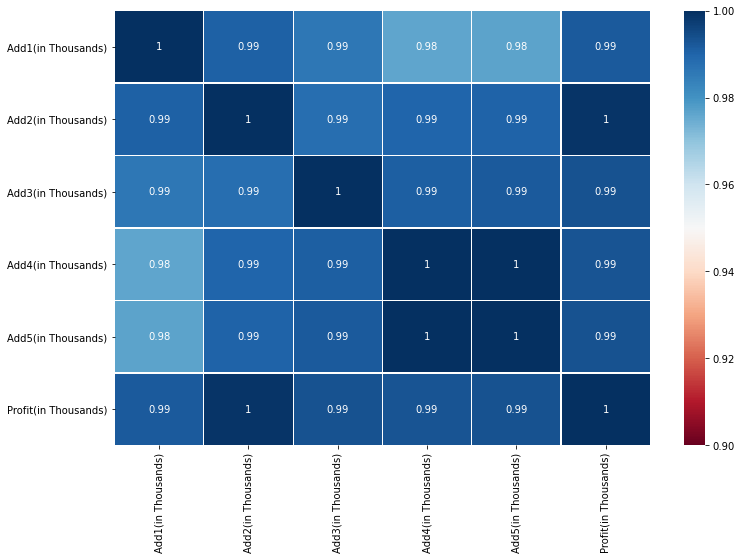

In [8]:
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(),vmin=.9,vmax=1,annot=True,Linewidth=.2,cmap="RdBu")

##### From the correlation heat map its clear that all the 5 features have high correlation with the target variable profit 

## visualisation of features and target

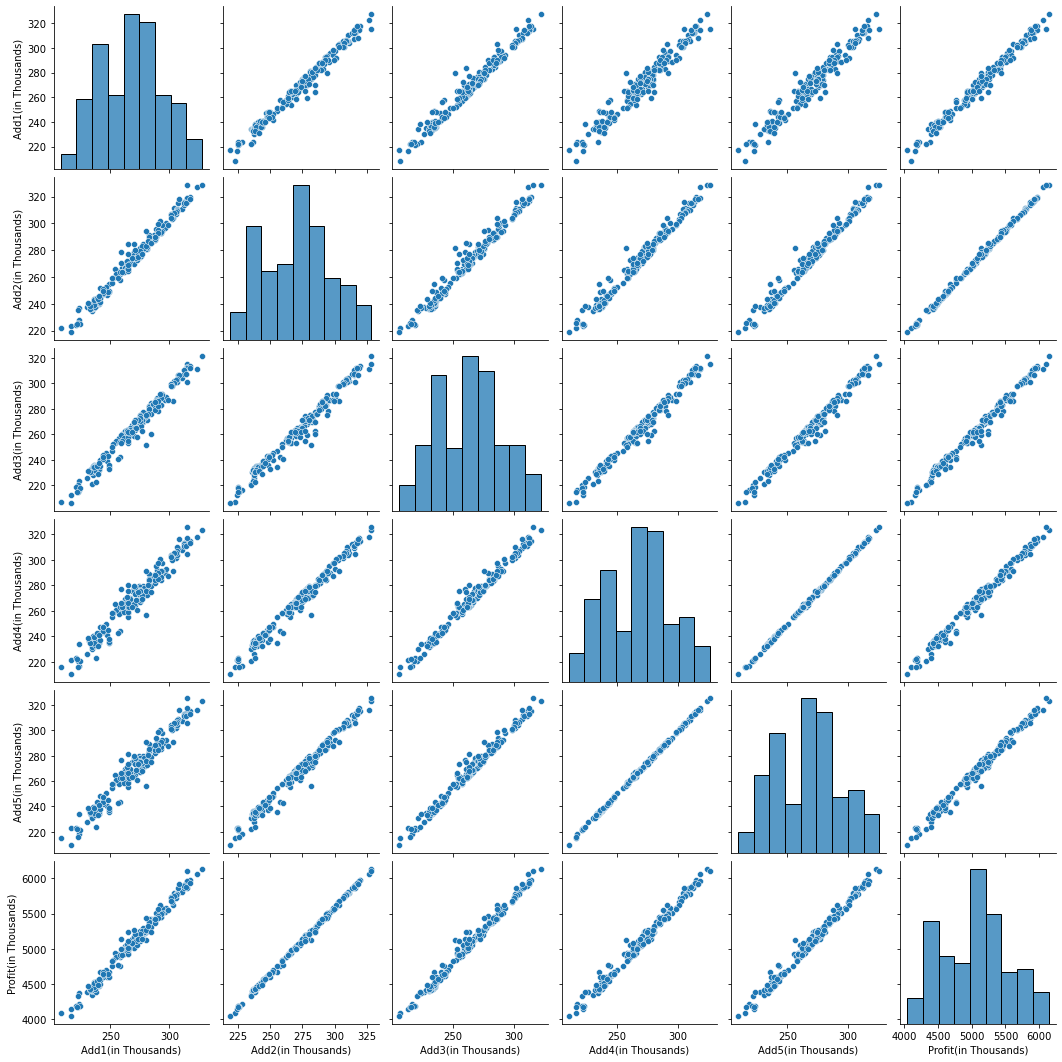

In [9]:
sns.pairplot(data) #plotting all the variables using pairplot

## splitting data into feature and target

In [10]:
TARGET=data['Profit(in Thousands)']
FEATURE=data.drop(['Profit(in Thousands)','Date'],axis=1) #droping profit column from data

In [11]:
FEATURE.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90


In [12]:
FEATURE.shape


(205, 5)

In [13]:
TARGET[:10]

0    4093.065
1    4042.448
2    4213.819
3    4391.665
4    4350.683
5    4404.686
6    4418.709
7    4470.775
8    4425.005
9    4446.441
Name: Profit(in Thousands), dtype: float64

## splitting feature and target into train and test data

In [14]:
x_train,x_test,y_train,y_test=train_test_split(FEATURE,TARGET,test_size=.25,random_state=42)

In [15]:
x_train.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
90,254.70,262.20,254.65,260.70,260.65
173,310.70,310.70,304.05,307.70,307.20
93,246.50,252.35,245.55,250.00,250.20
5,234.05,235.95,230.20,233.50,233.75
167,290.25,294.90,278.60,289.55,288.35


In [16]:
x_test.shape

(52, 5)

In [17]:
y_test.shape

(52,)

In [18]:
x_test.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
15,216.35,223.70,212.65,221.65,222.65
9,233.55,239.20,230.75,234.00,233.30
100,280.00,281.35,251.85,257.00,255.90
132,258.05,263.50,253.70,263.45,262.20
68,265.10,268.40,261.20,263.15,265.60


## linear rgression and checking for accuracy

In [19]:
lr=LinearRegression() #creating instance
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test) #target prediction
prediction[:10]

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323])

In [20]:
y_test[:10]

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
Name: Profit(in Thousands), dtype: float64

## coefficient and intercept 

In [21]:
model.coef_ # coeficient of linearequation of fit line

array([ 1.  , 12.38,  3.5 ,  1.  ,  0.9 ])

In [22]:
import numpy as np #importing numpy

In [23]:
model.intercept_ 

1.8189894035458565e-12

In [24]:
np.round(model.intercept_ )

0.0

## Mean squared error calculation

In [25]:
MSE=mean_squared_error(y_test,prediction)
MSE

1.0498830851634581e-24

In [26]:
np.round(MSE)  #rounding into smalles decimel value

0.0

## Accuracy calculation

In [27]:
sum(prediction)/sum(y_test) #dividing sum of profit predicted with sum actual output

0.9999999999999999

#### Model have  MSE value approximately zero with 99.99 % accuracy

## Predicting Profit generated by the company from given ad expenditure

In [28]:
new_ad_exp=[[290,312,309,298,320]]
profit_generated=model.predict(new_ad_exp)
print('Profit generated by the company from the given ad expenditure is-',np.round(profit_generated[0],2))

Profit generated by the company from the given ad expenditure is- 5820.06
